# 03 - Interactive Viz

In this homework we will be exploring interactive visualization, which is a key ingredient of many successful data visualizations (especially when it comes to infographics).

Please read the notebook from [this URL](http://nbviewer.jupyter.org/github/nunomota/ada2017-hw/blob/master/Homework_02/Homework_02.ipynb).

### Content:
* [Task 1](#t1)
* [Task 2](#t2)
* [Task 3](#t3)
* [Task 4](#t4)

# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import json
import folium
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

# We will use this to compute the harmonic mean in Task 4
from scipy import stats

# Constants definition

In [2]:
DATA_PATH = './data/'
TOPOJSON_PATH = './topojson/'
EUROSTAT_FILE = 'lfsq_urgaed_sheets.xls'
AMSTAT_FILE = '2_1 Tasso di disoccupazione.xlsx'
ORIGIN_AGE_FILE = '1_1 Disoccupati e persone in cerca d_impiego secondo criteri vari.xlsx'
COUNTRY_LATLONG_FILE = 'countries_latlong.csv'
CANTON_LATLONG_FILE = 'cantons_latlong.csv'
COORDINATE_EUROPE = [54.5260, 15.2551]
COORDINATE_SWITZERLAND = [46.8182, 8.2275]

# Task 1 <a name="t1">

From the eurostat website we found a dataset that includes the European unemployment rates at a recent date. We chose the dataset containing the quaterly unemployment rates, so that we could get the most recent data. We also made sure that the chosen dataset included the rates for Switzerland as well.

We downloaded a dataset containing both the IDs and the name for each country, since this allows us to compare the IDs from the dataset and the TopoJSON file and verify that all the countries will be matched correctly.

#### Read European data
Therefore, we first read the `.xls` file containing the unemployment rates per country. 

In [3]:
# Read Europe unemployment data
def read_europe_df(sheet):
    # Read xls file
    df = pd.read_excel('{dp}{f}'.format(dp=DATA_PATH, f=EUROSTAT_FILE),
        sheetname=sheet, skiprows=[12,13,14,15,16,17], header=10, na_values=':')

    # Rename country IDs and names columns
    df.rename(columns={'GEO': 'id', 'GEO(L)/TIME': 'name'}, inplace=True)

    # We need to replace the IDs for UK and Greece so that they match TopoJSON IDs
    return df.replace('UK', 'GB').replace('EL', 'GR')

europe_df = read_europe_df('Data5')

The following is a sample of our dataframe:

In [4]:
europe_df.head()

,id,name,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2
0,BE,Belgium,8.8,8.4,8.2,8.7,8.3,7.9,7.9,7.2,7.7,7.0
1,BG,Bulgaria,10.6,9.9,8.3,7.9,8.6,8.1,7.0,6.7,6.9,6.3
2,CZ,Czech Republic,6.0,4.9,4.8,4.5,4.4,3.9,4.0,3.6,3.5,3.0
3,DK,Denmark,6.6,6.0,6.2,5.8,6.3,6.0,6.3,6.1,6.5,5.5
4,DE,Germany (until 1990 former territory of the FRG),5.0,4.7,4.4,4.5,4.5,4.2,4.0,3.8,4.1,3.8


#### Obtain recent unemployment rate

We will average the rates for the last 4 quarters, that is:
* 2016, Quarter 3
* 2016, Quarter 4
* 2017, Quarter 1
* 2017, Quarter 2

In this way we have the most recent information over a year, making sure that we avoid any possible seasonal trends on unemployment.

In [5]:
europe_df['recent'] = europe_df[['2016Q3', '2016Q4', '2017Q1', '2017Q2']].mean(axis=1)
recent_europe_df = europe_df[['id', 'recent']]
recent_europe_df.head()

,id,recent
0,BE,7.450
1,BG,6.725
2,CZ,3.525
3,DK,6.100
4,DE,3.925


#### Remove countries from TopoJSON file

In order to create the map of Europe, we will first read and modify the topoJSON file for Europe. We remove from it all the countries that we do not have information about, so that they are not plotted in the map.

In [6]:
# Load topojson file for Europe
europe_topo_path = r'{tp}europe.topojson.json'.format(tp=TOPOJSON_PATH)
geo_json = json.load(open(europe_topo_path))

# We keep only the countries we have information of
geo_countries = []
for c in geo_json['objects']['europe']['geometries']:
    if c['id'] in list(europe_df['id']):
        geo_countries.append(c)

# We substitute the list of countries
geo_json['objects']['europe']['geometries'] = geo_countries
geo_data = json.dumps(geo_json)

#### Create map

Lastly, we create the map for Europe.

TODO: choose and explain colors

TODO: Choose best background! I plotted all of them to compare them...

TODO: split the intervals into data classes and explain why those

TODO: Add markers including the name of the country and the actual rate? (*interactions you could add in order to make the visualization intuitive and expressive*) (Example of implementation in next cell, maybe put the markers in the capital city of the country?)

TODO: Compare Switzerland's unemployment rate to that of the rest of Europe (it's the main goal of this task)

TODO: Decide how to compute the values for the plot

* (Change and) Explain colors used [url given in assignment](https://carto.com/academy/courses/intermediate-design/choose-colors-1/)
* Export map
* ? Explain intervals considered... [url given in assignment](http://gisgeography.com/choropleth-maps-data-classification/)
* Highlight Switzerland somehow...

Suggestions:
* ? Add Interactivity (eg choose sex, age...)
* ? Set a color scale for countries with less unemployment than switzerland, other for more than Switerland

Useful URLs:
* [Many examples](http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/) (very good)
    * [Markers](http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/ContinuousWorld.ipynb), [Markers2](http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/FeatureGroup.ipynb), [Marker cluster](http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb), [Popups](http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Popups.ipynb)
    * [LayerControl and others](http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Features.ipynb)
    * [Timestamp (and others?)](http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/HeatMapWithTime.ipynb), [Time slider](http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/TimeSliderChoropleth.ipynb)
    * [Many plugins](http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Plugins.ipynb)
    * [Tiles](http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/TilesExample.ipynb)
* [Colormap](https://nbviewer.jupyter.org/github/python-visualization/folium/blob/v0.2.0/examples/Colormaps.ipynb), [Colors](https://github.com/python-visualization/folium/blob/v0.2.0/folium/utilities.py#L104)
* [Folium doc](https://media.readthedocs.org/pdf/folium/latest/folium.pdf) (not very good)
* [Pretty example](http://andrewgaidus.com/leaflet_webmaps_python/)

In [7]:
DEFAULT_FONT_SIZE = 24
DEFAULT_IMG_WIDTH = 64
DEFAULT_IMG_HEIGHT = 64
DEFAULT_TEXT_OFFSET = 8
DEFAULT_FONT_COLOR = 'white'
DEFAULT_BG_COLOR = 'black'
DEFAULT_BG_ALPHA = 0.6
DEFAULT_BG_RADIUS_COMPENSATION = DEFAULT_IMG_WIDTH/20
DEFAULT_PALETTE_ICON = 'https://i.imgur.com/HJLCoHt.png'

def generate_custom_icon(percentage):
    """
    Returns a fully customized DivIcon that can be used
    as a Marker - in folium.
    """
    return DivIcon(
        icon_size=(DEFAULT_IMG_WIDTH, DEFAULT_IMG_HEIGHT),
        icon_anchor=(DEFAULT_IMG_WIDTH/2, DEFAULT_IMG_HEIGHT/2),
        html=generate_custom_icon_html(percentage)
    )
    
def generate_custom_icon_html(percentage):
    """
    Returns an inlined HTML string representing the
    customized icon, along with a centered percentage.
    """
    html_string = (
        '<div>'
            '<svg width="{1}" height="{2}">'
                '<defs>'
                    '<pattern id="image-bg" x="0" y="0" height="{2}" width="{1}" patternUnits="userSpaceOnUse">'
                        '<image width="{1}" height="{2}" xlink:href="{4}"></image>'
                    '</pattern>'
                '</defs>'
                '<circle cx="{5}" cy="{6}" r="{11}" fill="{9}" fill-opacity="{10}"/>'
                '<circle cx="{5}" cy="{6}" r="{5}" fill="url(#image-bg)"/>'
                '<text x="{5}" y="{7}" font-size="{0}" text-anchor="middle" fill="{3}">{8}%</text>'
            '</svg>'
        '</div>'
    )
    
    return html_string.format(
        DEFAULT_FONT_SIZE,
        DEFAULT_IMG_WIDTH, 
        DEFAULT_IMG_HEIGHT,   
        DEFAULT_FONT_COLOR,
        DEFAULT_PALETTE_ICON,
        DEFAULT_IMG_WIDTH/2,
        DEFAULT_IMG_HEIGHT/2,
        DEFAULT_IMG_HEIGHT/2 + DEFAULT_TEXT_OFFSET,
        round(percentage),
        DEFAULT_BG_COLOR,
        DEFAULT_BG_ALPHA,
        DEFAULT_IMG_WIDTH/2 - DEFAULT_BG_RADIUS_COMPENSATION
    )

Read LatLong coordinates, for every country.

In [8]:
# Read LatLong coordinates into a dataframe
country_latlong_df = pd.read_csv('{dp}{f}'.format(dp=DATA_PATH, f=COUNTRY_LATLONG_FILE))
country_latlong_df.columns = country_latlong_df.columns.map(lambda x: x.strip())

# Merge the LatLong coordinates into the already existing dataframe
recent_europe_df = recent_europe_df.merge(country_latlong_df, how='inner', left_on='id', right_on='country').drop(['country'], axis=1)

In [9]:
from folium.plugins import MarkerCluster
from folium.features import DivIcon

# Create a new map
map_europe = folium.Map(COORDINATE_EUROPE, tiles=None, zoom_start=3)

# Add tile layers
folium.TileLayer('stamentoner').add_to(map_europe)
folium.TileLayer('cartodbdark_matter').add_to(map_europe)
folium.TileLayer('cartodbpositron').add_to(map_europe)

# Plot total unemployment
map_europe.choropleth(geo_data=json.loads(geo_data), name='Total Population',
    data=recent_europe_df, columns=['id', 'recent'], key_on='feature.id', fill_opacity=1,
    fill_color='YlOrRd', topojson='objects.europe')

# Marker cluster / Custom html icon
marker_cluster = MarkerCluster(name='[Markers] Total Population').add_to(map_europe)
for index, row in recent_europe_df.iterrows():
    lat = row['latitude']
    long = row['longitude']
    percent = row['recent']
    country_name = row['name']
    folium.Marker([lat, long], icon=generate_custom_icon(percent), popup=country_name).add_to(marker_cluster)

# Add LayerControl
folium.LayerControl(collapsed=False).add_to(map_europe)

map_europe

# Task 2 <a name="t2">
In the amstat website we found a dataset including the unemployment rates in Switzerland for the last 12 months.

#### Read data
We read the unemployment rates for the last 12 months. In this case we create a function that returns a dataframe containing the average (*Totale*) for those months, as well as a column with the IDs for each canton. 

Therefore, the variables we read from this dataset for each canton are:
* Unemployment rate
* Unemployed
* Looking for job
* Not unemployed looking for job

In [10]:
# Load topojson file for Europe
swiss_topo_path = r'{tp}ch-cantons.topojson.json'.format(tp=TOPOJSON_PATH)
geo_json = json.load(open(swiss_topo_path))

In [11]:
def get_clean_swiss_df(file, headers, dictionary, ids):
    # Read xls file containing Swiss unemployment data
    df = pd.read_excel('{dp}{f}'.format(dp=DATA_PATH, f=file), header=headers)
    df.drop(('Metriche', 'mese'), axis=1, inplace=True)

    # We will create a dataframe in English with the variables we need
    clean_df = pd.DataFrame()

    # For each variable, we get the 'Total' column
    variables_list = df.columns.get_level_values(0).unique()
    for v in variables_list:
        clean_df[italian_english_variables[v]] = df[(v, 'Totale')]

    clean_df.drop('Totale', inplace=True)

    # Add 'id' column to the dataframe
    clean_df['id'] = ids
    
    return clean_df

The IDs were directly taken from the TopoJSON file, since we manually verified that the cantons are in the same order in both the TopoJSON file and the data files we obtained from amstat. We translate the names of the variables to English using a manually defined dictionary

In [12]:
# Manually define dictionary with translations to English
italian_english_variables = {
    "Tasso di disoccupazione": 'Unemployment rate',
    "Disoccupati registrati": 'Unemployed',
    "Persone in cerca d'impiego": 'Looking for job',
    "Persone in cerca d'impiego non disoccupate": 'Not unemployed looking for job',
    'stranieri': 'Foreigners',
    'svizzeri': 'Swiss'
}

In [13]:
# Get the 'id' for each canton directly from the JSON file
cantons_id = []
for c in geo_json['objects']['cantons']['geometries']:
    cantons_id.append(c['id'])

switzerland_df = get_clean_swiss_df(file=AMSTAT_FILE, headers=[2,3],
    dictionary=italian_english_variables, ids=cantons_id)

The following is a sample of the resulting dataframe:

In [14]:
switzerland_df.set_index('id').head()

,Unemployment rate,Unemployed,Looking for job,Not unemployed looking for job
id,,,,
ZH,3.6,355658,440479,84821
BE,2.7,181433,238627,57194
LU,1.9,51925,87769,35844
UR,1.1,2430,4314,1884
SZ,1.8,18765,28363,9598


#### Add data on people looking for a job
The Swiss Confederation defines the `Unemployment rate` as the number of unemployed registered, divided by the size of the active population, multiplied by 100 ([reference](https://www.amstat.ch/v2/definition.jsp?lang=fr)).

We will now include the `Looking for job rate`. We will compute it as the size of the respective population, divided by the size of the active population and multiplied by 100. We will then plot both rates to see if there are differences.

We do not compute and plot the `Not unemployed looking for job` rate (i.e. people who already have a job and are looking for a new one), since it is equal to substracting the `Unemployment rate` from the `Looking for job rate`.

In [15]:
switzerland_df['Looking for job rate'] = (switzerland_df['Unemployment rate'] *
    switzerland_df['Looking for job'] / switzerland_df['Unemployed'])

switzerland_df.drop(['Unemployed', 'Looking for job',
    'Not unemployed looking for job'], axis=1).set_index('id').head()

,Unemployment rate,Looking for job rate
id,,
ZH,3.6,4.458565
BE,2.7,3.551134
LU,1.9,3.211576
UR,1.1,1.952840
SZ,1.8,2.720671


#### Create map <a name="cm">

In [16]:
# Read each canton's lat long coordinates
canton_latlong_df = pd.read_csv('{dp}{f}'.format(dp=DATA_PATH, f=CANTON_LATLONG_FILE))
print(len(switzerland_df))

# Merge the LatLong coordinates into the already existing dataframe
switzerland_df = switzerland_df.merge(canton_latlong_df, how='inner', left_on='id', right_on='id')

26


In [17]:
switzerland_df.head()

,Unemployment rate,Unemployed,Looking for job,Not unemployed looking for job,id,Looking for job rate,latitude,longitude
0,3.6,355658,440479,84821,ZH,4.458565,47.3769,8.5417
1,2.7,181433,238627,57194,BE,3.551134,46.9480,7.4474
2,1.9,51925,87769,35844,LU,3.211576,47.0502,8.3093
3,1.1,2430,4314,1884,UR,1.952840,46.7739,8.6025
4,1.8,18765,28363,9598,SZ,2.720671,47.0207,8.6530


In [18]:
# Create a new map
map_swiss = folium.Map(COORDINATE_SWITZERLAND,
    tiles='cartodbpositron', zoom_start=8)

# Plot people looking for a job
map_swiss.choropleth(geo_data=geo_json, name='Looking for job',
    data=switzerland_df, columns=['id', 'Looking for job rate'], key_on='feature.id', fill_opacity=1,
    fill_color='YlOrRd', topojson='objects.cantons')

# Marker cluster / Custom html icon
marker_cluster = MarkerCluster(name='[Markers] Looking for Job').add_to(map_swiss)
for index, row in switzerland_df.iterrows():
    lat = row['latitude']
    long = row['longitude']
    canton_id = row['id']
    percent = row['Looking for job rate']
    folium.Marker([lat, long], icon=generate_custom_icon(percent), popup=canton_id).add_to(marker_cluster)

# Plot people that are unemployed
map_swiss.choropleth(geo_data=geo_json, name='Unemployed',
    data=switzerland_df, columns=['id', 'Unemployment rate'], key_on='feature.id', fill_opacity=1,
    fill_color='YlOrRd', topojson='objects.cantons')

# Marker cluster / Custom html icon
marker_cluster = MarkerCluster(name='[Markers] Unemployed').add_to(map_swiss)
for index, row in switzerland_df.iterrows():
    lat = row['latitude']
    long = row['longitude']
    canton_id = row['id']
    percent = row['Unemployment rate']
    folium.Marker([lat, long], icon=generate_custom_icon(percent), popup=canton_id).add_to(marker_cluster)

# Add LayerControl
folium.LayerControl(collapsed=False).add_to(map_swiss)

map_swiss

TODO: Comment this... ?

# Task 3 <a name="t3">
We use the amstat website again to find a dataset that includes the unemployment rates in Switzerland at recent date, this time making a distinction between Swiss and foreign workers.

The Economic Secretary (SECO) releases a monthly report on the state of the employment market. In the latest report (September 2017), it is noted that there is a discrepancy between the unemployment rates for foreign (5.1%) and Swiss (2.2%) workers.

Show the difference in unemployment rates between the two categories in each canton on a Choropleth map. Where are the differences most visible ? Why do you think that is ?

#### Read data
We now define a function to compute the average unemployment data for a dataframe containing the data for several months.

In [19]:
def get_average_swiss_df(df, dictionary, ids):
    # We will create a dataframe in English with the variables we need
    clean_df = pd.DataFrame()

    # For each variable, we get an average column
    variables_list = df.columns.get_level_values(0).unique()
    for v in variables_list:
        clean_df[italian_english_variables[v]] = df[v].mean(axis=1)
    
    # Drop 'Totale' row
    clean_df.drop('Totale', inplace=True)
    
    # Add 'id' column to the dataframe
    clean_df['id'] = ids
    
    # Drop variables we will not use
    clean_df.drop(italian_english_variables["Persone in cerca d'impiego"],
        axis=1, inplace=True)
    clean_df.drop(italian_english_variables["Persone in cerca d'impiego non disoccupate"],
        axis=1, inplace=True)
    
    return clean_df

We read the file containing the unemployment data for both foreigners and Swiss.

Then, we create a dictionary containing two dataframes: one for foreigners and another one for Swiss. We apply the function to each of the dataframes to obtain the average per month.

In [20]:
# Read xls file containing unemployment data per origin
origin_df = pd.read_excel('{dp}{f}'.format(dp=DATA_PATH, f="foreign swiss {df}".format(df=AMSTAT_FILE)),
    header=[2,3,4])
origin_df.drop(('Nazionalità', 'Metriche', 'mese'), axis=1, inplace=True)

# We create a dictionary of dataframes
origin_df_dict = {}

# For each origin we get the corresponding dataframe
origins_list = origin_df.columns.get_level_values(0).unique()
for o in origins_list[:2]:
    origin_df_dict[italian_english_variables[o]] = get_average_swiss_df(
        origin_df[o],
        italian_english_variables, cantons_id
    ).merge(
        canton_latlong_df,
        how='inner',
        left_on='id',
        right_on='id'
    )

Samples of the dataframes:

In [21]:
origin_df_dict['Swiss'].set_index('id').head()

,Unemployment rate,Unemployed,latitude,longitude
id,,,,
ZH,2.716667,16108.833333,47.3769,8.5417
BE,1.975000,9375.833333,46.9480,7.4474
LU,1.366667,2487.750000,47.0502,8.3093
UR,0.558333,92.166667,46.7739,8.6025
SZ,1.241667,861.500000,47.0207,8.6530


In [22]:
origin_df_dict['Foreigners'].set_index('id').head()

,Unemployment rate,Unemployed,latitude,longitude
id,,,,
ZH,5.925000,13529.333333,47.3769,8.5417
BE,6.475000,5743.583333,46.9480,7.4474
LU,4.491667,1839.333333,47.0502,8.3093
UR,4.350000,110.333333,46.7739,8.6025
SZ,3.900000,702.250000,47.0207,8.6530


#### Create map to compare Swiss and foreign unemployment rates

In [23]:
# Create a new map
map_swiss = folium.Map(COORDINATE_SWITZERLAND,
    tiles='cartodbpositron', zoom_start=8)

# Plot unemployment rate for Swiss
map_swiss.choropleth(geo_data=geo_json, name='Swiss',
    data=origin_df_dict['Swiss'], columns=['id', 'Unemployment rate'], key_on='feature.id', fill_opacity=1,
    fill_color='YlOrRd', topojson='objects.cantons')

# Marker cluster / Custom html icon
marker_cluster = MarkerCluster(name='[Markers] Swiss').add_to(map_swiss)
for index, row in origin_df_dict['Swiss'].iterrows():
    lat = row['latitude']
    long = row['longitude']
    canton_id = row['id']
    percent = row['Unemployment rate']
    folium.Marker([lat, long], icon=generate_custom_icon(percent), popup=canton_id).add_to(marker_cluster)

# Plot unemployment rate for Foreigners
map_swiss.choropleth(geo_data=geo_json, name='Foreign',
    data=origin_df_dict['Foreigners'], columns=['id', 'Unemployment rate'], key_on='feature.id', fill_opacity=1,
    fill_color='YlOrRd', topojson='objects.cantons')

# Marker cluster / Custom html icon
marker_cluster = MarkerCluster(name='[Markers] Foreign').add_to(map_swiss)
for index, row in origin_df_dict['Foreigners'].iterrows():
    lat = row['latitude']
    long = row['longitude']
    canton_id = row['id']
    percent = row['Unemployment rate']
    folium.Marker([lat, long], icon=generate_custom_icon(percent), popup=canton_id).add_to(marker_cluster)

# Add LayerControl
folium.LayerControl(collapsed=False).add_to(map_swiss)

map_swiss

It is interesting to compare both in the same scale:

In [24]:
# Create common scale
minimum = min(min(origin_df_dict['Swiss']['Unemployment rate']), min(origin_df_dict['Foreigners']['Unemployment rate']))
maximum = max(max(origin_df_dict['Swiss']['Unemployment rate']), max(origin_df_dict['Foreigners']['Unemployment rate']))
common_scale = list(np.linspace(minimum, maximum, 6))

# Create a new map
map_swiss = folium.Map(COORDINATE_SWITZERLAND,
    tiles='cartodbpositron', zoom_start=8)

# Plot unemployment rate for Swiss
map_swiss.choropleth(geo_data=geo_json, name='Swiss',
    data=origin_df_dict['Swiss'], columns=['id', 'Unemployment rate'], key_on='feature.id', fill_opacity=1,
    fill_color='YlOrRd', topojson='objects.cantons', threshold_scale=common_scale)

# Marker cluster / Custom html icon
marker_cluster = MarkerCluster(name='[Markers] Swiss').add_to(map_swiss)
for index, row in origin_df_dict['Swiss'].iterrows():
    lat = row['latitude']
    long = row['longitude']
    canton_id = row['id']
    percent = row['Unemployment rate']
    folium.Marker([lat, long], icon=generate_custom_icon(percent), popup=canton_id).add_to(marker_cluster)

# Plot unemployment rate for Foreigners
map_swiss.choropleth(geo_data=geo_json, name='Foreign',
    data=origin_df_dict['Foreigners'], columns=['id', 'Unemployment rate'], key_on='feature.id', fill_opacity=1,
    fill_color='YlOrRd', topojson='objects.cantons', threshold_scale=common_scale)

# Marker cluster / Custom html icon
marker_cluster = MarkerCluster(name='[Markers] Foreign').add_to(map_swiss)
for index, row in origin_df_dict['Foreigners'].iterrows():
    lat = row['latitude']
    long = row['longitude']
    canton_id = row['id']
    percent = row['Unemployment rate']
    folium.Marker([lat, long], icon=generate_custom_icon(percent), popup=canton_id).add_to(marker_cluster)

# Add LayerControl
folium.LayerControl(collapsed=False).add_to(map_swiss)

map_swiss

It is observed clearly that in most cantons the unemployment rate is higher for foreigners than for Swiss.

In most Switzerland there is a constant relatively low unemployment rate. However, it is higher in Ticino, Zürich and the French speaking part of Switzerland. 

As for the unemployment rate for Swiss people, it is higher in the West part of Switzerland. Jura and Neuchâtel have the highest unemployment rates.

#### Compare unemployment rates including differences between age groups
Now we refine the analysis by adding the differences between age groups. Since it is nearly impossible to plot so many variables on a map we make a bar plot instead, which is a better option.

In [25]:
# Read xls file containing unemployment data per age
age_df = pd.read_excel('{dp}{f}'.format(dp=DATA_PATH, f="ages {df}".format(df=AMSTAT_FILE)),
    header=[2,4,5])
age_df.drop(("Classi d'età 15-24, 15-49, 50 anni e più", 'Metriche', 'mese'), axis=1, inplace=True)

# We create a dictionary to map age class with the corresponding age range
age_labels_dic = {'1': '15-24', '2': '15-49', '3': '+50'}

# We create a dictionary of dataframes
age_df_dict = {}

# For each age we get the corresponding dataframe
ages_list = age_df.columns.get_level_values(0).unique()
for o in ages_list[:3]:
    age_df_dict[age_labels_dic[o]] = get_average_swiss_df(age_df[o],
        italian_english_variables, cantons_id)

Samples:

In [26]:
age_df_dict['15-24'].set_index('id').head()

,Unemployment rate,Unemployed
id,,
ZH,3.733333,3434.083333
BE,2.841667,2042.666667
LU,2.241667,701.666667
UR,0.933333,28.333333
SZ,1.408333,163.500000


#### Get rate per age and origin

In [27]:
def rename_row_values(df):
    """
    Creates a new dataframe that contains all the rows'
    values trnaslated to english for better understanding
    and clarity.
    """
    nationality_rename_dic = {
        'stranieri':'foreign',
        'svizzeri':'swiss'
    }
    age_range_rename_dic = {
        '15-24 anni':'15-24',
        '25-49 anni':'25-49',
        '50 anni e più':'50+'
    }
    age_group_rename_dic = {
        '1':'1',
        '2':'2',
        '3':'3',
        'Totale':'Total'
    }
    renamed_df = df
    renamed_df['Nationality'] = renamed_df['Nationality'].apply(lambda x: nationality_rename_dic.get(x, 'all'))
    renamed_df['Age Range'] = renamed_df['Age Range'].apply(lambda x: age_range_rename_dic.get(x, float('NaN')))
    renamed_df['Age Group'] = renamed_df['Age Group'].apply(lambda x: age_group_rename_dic.get(x, 'Total'))
    return renamed_df

def refine_origin_age_df(df):
    """
    Creates a new dataframe that contains all the columns'
    names translated to english for better understanding
    and clarity.
    """
    refined_df = df
    refined_df.columns = df.columns.droplevel(1)
    refined_df.drop(['mese'], axis=1, inplace=True)
    rename_dic = {
        'Cantone':'Canton',
        'Nazionalità':'Nationality',
        'Classi d\'età 15-24, 15-49, 50 anni e più':'Age Group',
        'Ottobre 2016':'October 2016',
        'Novembre 2016':'November 2016',
        'Dicembre 2016':'December 2016',
        'Gennaio 2017':'January 2017',
        'Febbraio 2017':'February 2017',
        'Marzo 2017':'March 2017',
        'Aprile 2017':'April 2017',
        'Maggio 2017':'May 2017',
        'Giugno 2017':'June 2017',
        'Luglio 2017':'July 2017',
        'Agosto 2017':'August 2017',
        'Settembre 2017':'September 2017'
    }
    refined_df.rename(columns=rename_dic, inplace=True)
    refined_df.columns.values[2] = 'Age Range'
    refined_df = rename_row_values(refined_df)
    return refined_df

In [28]:
# Read Excel file with information on age group and origin
origin_age_df = pd.read_excel('{dp}{f}'.format(dp=DATA_PATH, f=ORIGIN_AGE_FILE), header=[2, 3])

In [29]:
# Format and reindex dataframe
origin_age_df = refine_origin_age_df(origin_age_df)
origin_age_df.set_index(origin_age_df['Age Group'], append=True, inplace=True)
origin_age_df.set_index(origin_age_df['Nationality'], append=True, inplace=True)

# Create a dataframe with an average over all the read months
origin_age_df = origin_age_df.filter(like='20').mean(axis=1, skipna=True).to_frame()
origin_age_df.head(9)

0
       Age Group Nationality              
Zurigo 1         foreign       1085.833333
       2         foreign       9963.333333
       3         foreign       2480.166667
       Total     foreign      13529.333333
       1         swiss         2348.250000
       2         swiss         8980.750000
       3         swiss         4779.833333
       Total     swiss        16108.833333
                 all          29638.166667

In [30]:
def get_origin_age_rates(df):
    """
    Creates a new dataframe with calculated ratios
    according to origin, age group and canton.
    """
    index_value_dic = df.to_dict()[0]
    cantons = df.index.get_level_values(0).unique().tolist()
    cantons.remove('Totale')
    ages = range(1, 4)
    nationalities = ['foreign', 'swiss']
    
    # Create
    rates_dic = {}
    swiss_population = index_value_dic[('Totale', 'Total', 'all')]
    for canton in cantons:
        canton_population = index_value_dic[(canton, 'Total', 'all')]
        for nationality in nationalities:
            nationality_population = index_value_dic[(canton, 'Total', nationality)]
            for age in ages:
                key = (canton, str(age), nationality)
                value = index_value_dic[key]
                rates_dic[key] = value / nationality_population
            rates_dic[(canton, 'Total', nationality)] = nationality_population / canton_population
        rates_dic[(canton, 'Total', 'all')] = canton_population / swiss_population
    
    rates_df = pd.DataFrame.from_dict(rates_dic, orient='index')
    rates_df.index = pd.MultiIndex.from_tuples(rates_df.index)
    rates_df.index.names = ['Canton', 'Age Group', 'Nationality']
    rates_df.columns = ['Rate']
    return rates_df

In [31]:
origin_age_df = get_origin_age_rates(origin_age_df)
origin_age_df.head(9)

Rate
Canton Age Group Nationality          
Zurigo 1         foreign      0.080258
       2         foreign      0.736425
       3         foreign      0.183318
       Total     foreign      0.456483
       1         swiss        0.145774
       2         swiss        0.557505
       3         swiss        0.296721
       Total     swiss        0.543517
                 all          0.202993

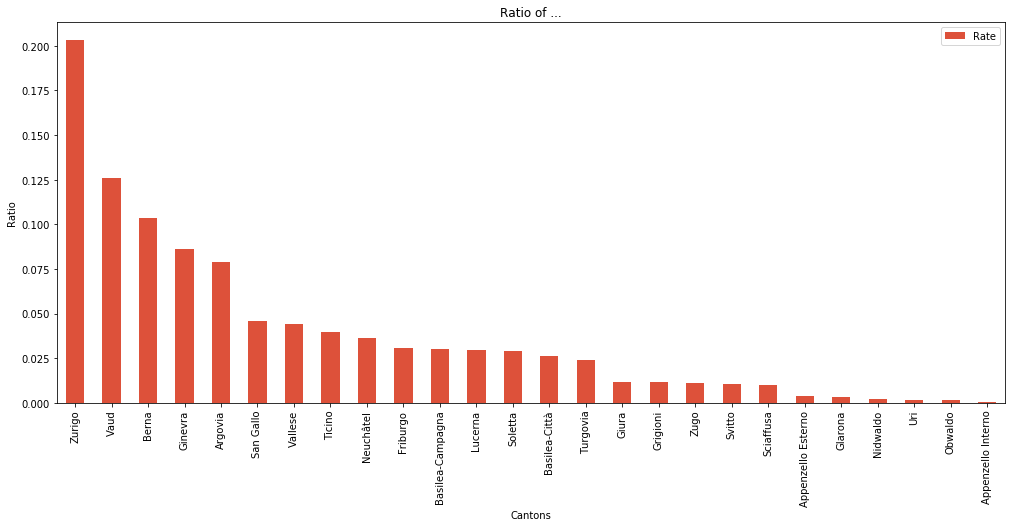

In [32]:
by_canton_df = origin_age_df.reset_index()

# Slim down the Dataframe by selecting the needed rows
by_canton_df = by_canton_df.loc[ (by_canton_df['Age Group'] == 'Total') & (by_canton_df['Nationality'] == 'all' ) ]

# Keep the useful cols
by_canton_df.drop(['Age Group', 'Nationality'], axis=1, inplace=True)

# Index by canton name
by_canton_df.set_index('Canton', drop=True, inplace=True)

# Order by the rate
by_canton_df.sort_values(by='Rate', ascending=False, inplace=True)


# Show the plot
color = cm.inferno_r(np.linspace(.4,.8, 30))
by_canton_df.plot.bar(figsize=(17, 7), color=color)

plt.title('Ratio of ...')
plt.ylabel("Ratio")
plt.xlabel('Cantons')
plt.show()

TODO:

* Find a way to obtain the rate per age and origin!! (can't download dataset with both...). Maybe I misunderstood the wording?
* Barplot with the info. Suggestions:
    * Maybe draw it with horizontal bars (many cantons)
    * Group them by age
    * Overlap swiss and foreign
* Conclusions, colors, intervals...

# Task 4 <a name="t4">

We use the maps we have built for Switzerland to give a rough estimate of the difference in unemployment rates between the areas divided by the Röstigraben.

For that we will use the unemployment rates for Swiss people only, since we saw that in most cases the unemployment was higher for foreigners and therefore we can consider that the unemployment in an area might depend on the number of foreigners.

From what we saw [previously](#cm), we can set an unemployment rate of 4.2 as the limit between cantons in both sides of the Röstigraben.

In [33]:
LIMIT_ROSTIGRABEN = 4.2

switzerland_df['class'] = (switzerland_df['Unemployment rate'] < LIMIT_ROSTIGRABEN)
switzerland_df['labels'] = switzerland_df['Unemployment rate'].apply(
    lambda x: 'German' if x < LIMIT_ROSTIGRABEN else 'French')

In [34]:
switzerland_df.head()

,Unemployment rate,Unemployed,Looking for job,Not unemployed looking for job,id,Looking for job rate,latitude,longitude,class,labels
0,3.6,355658,440479,84821,ZH,4.458565,47.3769,8.5417,True,German
1,2.7,181433,238627,57194,BE,3.551134,46.9480,7.4474,True,German
2,1.9,51925,87769,35844,LU,3.211576,47.0502,8.3093,True,German
3,1.1,2430,4314,1884,UR,1.952840,46.7739,8.6025,True,German
4,1.8,18765,28363,9598,SZ,2.720671,47.0207,8.6530,True,German


In [35]:
# Create a new map
map_swiss = folium.Map(COORDINATE_SWITZERLAND,
    tiles='cartodbpositron', zoom_start=8)

# Create scale
rosti_scale = list(np.linspace(minimum, maximum, 2))

# Plot unemployment rate for Swiss
map_swiss.choropleth(geo_data=geo_json, name='Estimated Röstigraben',
    data=switzerland_df, columns=['id', 'class'], key_on='feature.id', fill_opacity=1,
    fill_color='Accent', topojson='objects.cantons', threshold_scale=rosti_scale)

marker_cluster = MarkerCluster(name='[Markers] Cantons').add_to(map_swiss)
for index, row in switzerland_df.iterrows():
    lat = row['latitude']
    long = row['longitude']
    canton_id = row['id']
    folium.Marker([lat, long], popup=canton_id).add_to(marker_cluster)

map_swiss

To verify if their unemployment rates are very different or not, we compute the [harmonic mean](https://www.wikipedia.com/en/Harmonic_mean) for the two  groups of cantons that we obtained.

In [36]:
swiss_mean = switzerland_df[['labels', 'Unemployment rate']].groupby('labels').agg(stats.hmean)
swiss_std = switzerland_df[['labels', 'Unemployment rate']].groupby('labels').agg(np.std)

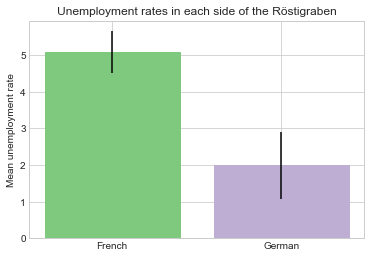

In [37]:
sns.set_style("whitegrid")

ind = np.arange(2)
barlist = plt.bar(ind, swiss_mean['Unemployment rate'], color='#d62728', yerr=swiss_std['Unemployment rate'])
barlist[0].set_color('#7fc97f')
barlist[1].set_color('#beaed4')

plt.ylabel('Mean unemployment rate')
plt.title('Unemployment rates in each side of the Röstigraben')
plt.xticks(ind, swiss_mean.index)

plt.show()

We can see that there is indeed a considerable difference in the unemployment rates for both groups of cantons.